In [2]:
!pip install numpy
!pip install matplotlib
!pip install pandas

/Users/ramsey/classwork/ESP3201/.venv/bin/pip: line 2: /Users/ramsey/classwork/ESP3201/Kalman Filter/.venv/bin/python: No such file or directory
/Users/ramsey/classwork/ESP3201/.venv/bin/pip: line 2: exec: /Users/ramsey/classwork/ESP3201/Kalman Filter/.venv/bin/python: cannot execute: No such file or directory
/Users/ramsey/classwork/ESP3201/.venv/bin/pip: line 2: /Users/ramsey/classwork/ESP3201/Kalman Filter/.venv/bin/python: No such file or directory
/Users/ramsey/classwork/ESP3201/.venv/bin/pip: line 2: exec: /Users/ramsey/classwork/ESP3201/Kalman Filter/.venv/bin/python: cannot execute: No such file or directory
/Users/ramsey/classwork/ESP3201/.venv/bin/pip: line 2: /Users/ramsey/classwork/ESP3201/Kalman Filter/.venv/bin/python: No such file or directory
/Users/ramsey/classwork/ESP3201/.venv/bin/pip: line 2: exec: /Users/ramsey/classwork/ESP3201/Kalman Filter/.venv/bin/python: cannot execute: No such file or directory


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from matplotlib.animation import FuncAnimation

In [4]:
# Load the dataset
file_path = './KF_Measurement.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()
# remove the 6th column
data = data.drop(data.columns[5], axis=1)
# name the columns
data.columns = ['time', 'measurementX', 'measurementY', 'groundTruthX', 'groundTruthY']
# Display the first few rows of the dataset
data.head()



,time,measurementX,measurementY,groundTruthX,groundTruthY
0,2,382.86,-284.94,397.27,-288.96
1,3,399.66,-294.40,384.96,-291.13
2,4,380.77,-287.84,372.65,-293.30
3,5,349.82,-291.50,360.34,-295.47
4,6,340.51,-282.48,348.03,-297.64


Step:  0 Error:  22.29611160045109
Step:  1 Error:  14.043928026083933
Step:  2 Error:  10.857273359504713
Step:  3 Error:  10.709195461388944
Step:  4 Error:  6.0694195943198
Step:  5 Error:  1.893039266700898
Step:  6 Error:  1.8571647661045343
Step:  7 Error:  7.72704587251558
Step:  8 Error:  5.126094805719136
Step:  9 Error:  8.07810850034687
Step:  10 Error:  6.639825854108331
Step:  11 Error:  3.6970868586654744
Step:  12 Error:  1.0346929331322972
Step:  13 Error:  2.3466996814450662
Step:  14 Error:  4.595060711158418
Step:  15 Error:  4.371333558825475
Step:  16 Error:  1.4140777150958026
Step:  17 Error:  1.5360896943283011
Step:  18 Error:  1.1038670007244789
Step:  19 Error:  2.489687202382211
Step:  20 Error:  2.1862952282032575
Step:  21 Error:  0.7018957317479533
Step:  22 Error:  0.9702431459472194
Step:  23 Error:  1.2517067665367376
Step:  24 Error:  2.862640347518797
Step:  25 Error:  3.4567086057285876
Step:  26 Error:  3.7949318723428798
Step:  27 Error:  3.031363

<Figure size 640x480 with 0 Axes>

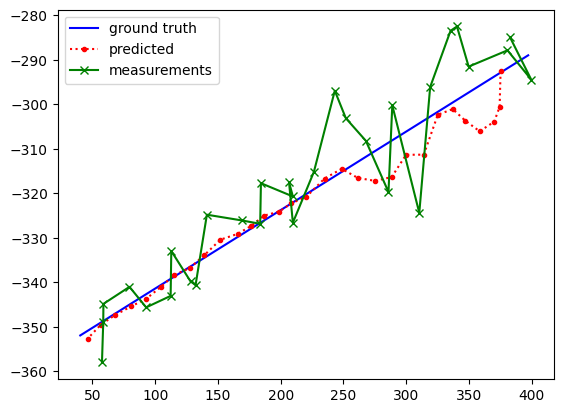

In [8]:
time = data['time'].values
measurements = data[['measurementX', 'measurementY']].values
groundTruth = data[['groundTruthX', 'groundTruthY']].values

# Constants
velocity = 15  # constant velocity
measurement_noise_std = 25 # standard deviation of measurement noise
dt = 1 # change in time is 1 second


# Initial state vector [x, y, vx, vy] Velocity is constant at 12.5 m/s
X = np.array([measurements[0, 0], measurements[0, 1], -12.5*math.sin(45), -12.5*math.sin(45)])

# State transition matrix A and B
A = np.array([[1, 0, dt, 0],
              [0, 1, 0, dt],
              [0, 0, 1, 0],
              [0, 0, 0, 1]])

# control input matrix B to allow for external control input
B = np.array([0,0,dt,dt]).T


# Measurement matrix H to extract the position from the state vector X and ignore the velocity in a 2 by 1 matrix
H = np.array([[1, 0, 0, 0],
              [0, 1, 0, 0]])

# [x ,y].T ???

# Measurement noise covariance R assuming independance
R = np.array([[measurement_noise_std**2, 0],
              [0, measurement_noise_std**2]])

# Process noise covariance matrix Q???
Q = np.eye(4) * 0.01


# Initial state covariance P ????
P = np.array([[velocity**2, 0, 0, 0],
                [0, velocity**2, 0, 0],
                [0, 0, (velocity/3)**2, 0],
                [0, 0, 0, (velocity/3)**2]])

ave_error = 0

# Kalman Filter implementation
predicted_states = []
for idx, step in enumerate(measurements):
    # prediction step
    Xp = A @ X + B @ np.array([0, 0, 0, 0]).T
    P = A @ P @ A.T + Q
    # calculate Kalman gain
    K = P @ H.T @ np.linalg.inv(H @ P @ H.T + R)
    Yt = step
    # update process and state matrix
    P = (np.eye(4) - K @ H) @  P
    X = Xp + K @ (Yt - H @ Xp)
    # current state becomes the predicted state????
    predicted_states.append(X[:2])
    # plot the expected state, the predicted state and the ground truth
    # plt.figure()
    # plt.xlim(0,400)
    # plt.ylim(-375,-250)
    # plt.ylabel("Y")
    # plt.xlabel("X")
    # plt.title("Step " + str(idx))
    # plt.plot(X[0], X[1], 'g', marker='o', label = "predicted")
    # plt.plot(step[0], step[1], 'r', marker='x', label = "measurements")
    # plt.plot(groundTruth[idx, 0], groundTruth[idx, 1], 'b', marker='.', label = "ground truth")
    # plt.legend()
    # show range of errors arround the predicted state, 2 standard deviations
    # plt.plot([X[0] - 2*math.sqrt(P[0,0]), X[0] + 2*math.sqrt(P[0,0])], [X[1], X[1]], 'g', linestyle=':')
    # plt.plot([X[0], X[0]], [X[1] - 2*math.sqrt(P[1,1]), X[1] + 2*math.sqrt(P[1,1])], 'g', linestyle=':')

    plt.savefig("output_" + str(idx) + ".jpg")

    calculated_error = np.linalg.norm(X[:2] - groundTruth[idx])



    ave_error += calculated_error

    print("Step: ", idx, "Error: ", calculated_error)


print("Average error: ", ave_error/len(measurements))
predicted_states = np.array(predicted_states)
plt.figure()
plt.plot(groundTruth[:, 0], groundTruth[:, 1], 'b', label = "ground truth")
plt.plot(predicted_states[:, 0], predicted_states[:, 1], 'r', marker='.', linestyle=':', label = "predicted")
plt.plot(measurements[:, 0], measurements[:, 1], 'g', marker='x', label = "measurements")
plt.legend()
plt.show()
